# Mount GDrive


In [ ]:
from google.colab import drive
drive.mount('/content/drive/')
%cd /content/drive/MyDrive/NewsStocksData
!ls

Mounted at /content/drive/
/content/drive/.shortcut-targets-by-id/1aXOjAYzBS5Ny20kYb43fbgy4HTmK06JQ/NewsStocksData
catboost_info  data.csv  new.xlsx  yahoo_data.xlsx


# Imports

In [ ]:
import pandas as pd
import numpy as np
from numpy import asarray
from pandas import read_csv
from pandas import DataFrame
from pandas import concat
from sklearn.ensemble import RandomForestRegressor
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV, KFold, cross_val_score
from sklearn.feature_selection import RFE
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error
import math
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Random Forest

In [ ]:
  df = pd.read_excel('new.xlsx')

In [ ]:
df.head()


,Unnamed: 0,Date,Open,High,Low,Adj Close**,Volume,Adj Close Stationary
0,1257,2018-05-01,24117.29,24117.29,23808.19,24099.05,380070000,NaN
1,1256,2018-05-02,24097.63,24185.52,23886.30,23924.98,385350000,-0.561669
2,1255,2018-05-03,23836.23,23996.15,23531.31,23930.15,389240000,0.016711
3,1254,2018-05-04,23865.22,24333.35,23778.87,24262.51,329480000,1.070547
4,1253,2018-05-07,24317.66,24479.45,24263.42,24357.32,307670000,0.304041


In [ ]:
df.drop('Unnamed: 0', axis=1, inplace=True)

In [ ]:
df = df.drop('Adj Close Stationary', axis=1)

In [ ]:
df['Year'] = df['Date'].apply(lambda time: time.year)

df['Month'] = df['Date'].apply(lambda time: time.month)

df['Day'] = df['Date'].apply(lambda time: time.day)

In [ ]:
df.head()

,Date,Open,High,Low,Adj Close**,Volume,Year,Month,Day
0,2018-05-01,24117.29,24117.29,23808.19,24099.05,380070000,2018,5,1
1,2018-05-02,24097.63,24185.52,23886.30,23924.98,385350000,2018,5,2
2,2018-05-03,23836.23,23996.15,23531.31,23930.15,389240000,2018,5,3
3,2018-05-04,23865.22,24333.35,23778.87,24262.51,329480000,2018,5,4
4,2018-05-07,24317.66,24479.45,24263.42,24357.32,307670000,2018,5,7


In [ ]:
X = df.drop('Adj Close**', axis=1)
y = df['Adj Close**']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

In [ ]:
date_all = X['Date']
date_test = X_test['Date']
X_train.drop('Date', axis=1, inplace=True)
X_test.drop('Date', axis=1, inplace=True)

In [ ]:
param_grid = {
    'max_depth': [5,10,20],
    'max_features' : [2,4,7],
    'n_estimators': [20,50,100]}

grid_search = GridSearchCV(estimator=RandomForestRegressor(random_state=42),
param_grid=param_grid,cv=KFold(n_splits=5, shuffle=True, random_state=1))


grid_search.fit(X_train, y_train)
y_pred = grid_search.predict(X_test)


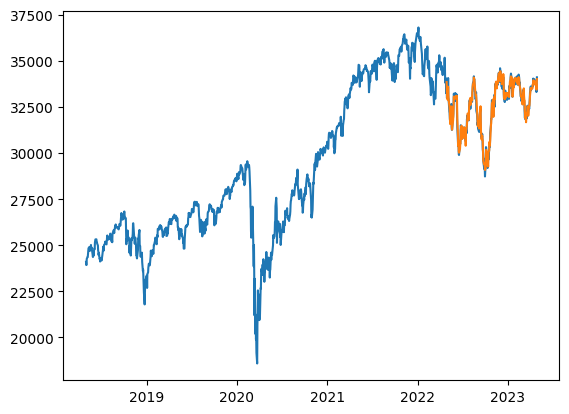

In [ ]:
plt.plot(date_all, y)
plt.plot(date_test, y_pred)
plt.show()

In [ ]:
mean_squared_error(y_test, y_pred)
math.sqrt(mean_squared_error(y_test, y_pred))

212.7037823329203

# Decision Tree


In [ ]:
param_grid = {
    'max_depth': [5, 10, 20],
    'max_features': [2, 4, 7]
}
grid_search = GridSearchCV(estimator=DecisionTreeRegressor(random_state=42),
                           param_grid=param_grid,
                           cv=KFold(n_splits=5, shuffle=True, random_state=1))

grid_search.fit(X_train, y_train)
y_pred = grid_search.predict(X_test)

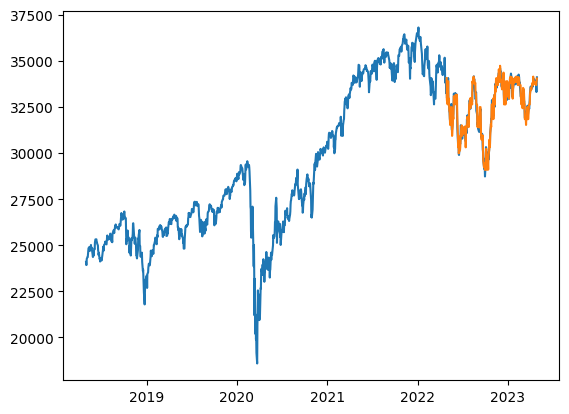

In [ ]:
plt.plot(date_all, y)
plt.plot(date_test, y_pred)
plt.show()

In [ ]:
mse = mean_squared_error(y_test, y_pred)
math.sqrt(mean_squared_error(y_test, y_pred))

265.12848826140066

# Forward propagation


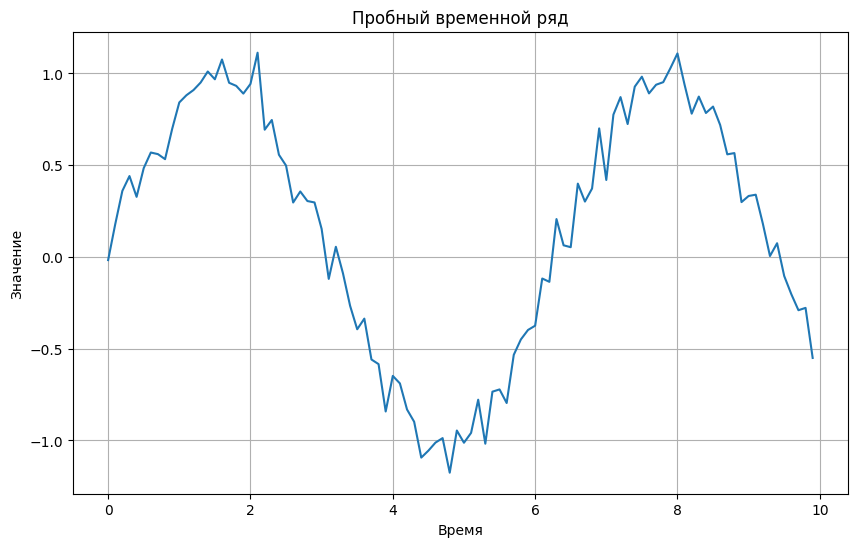

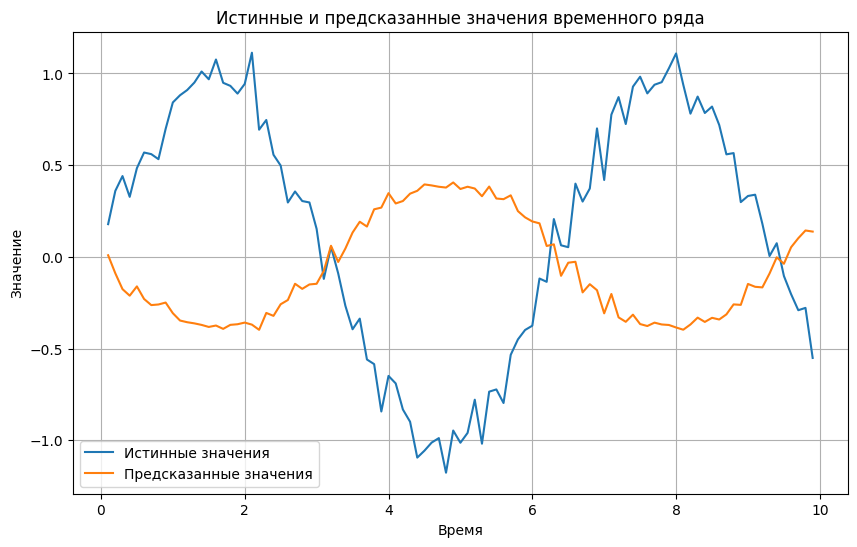

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
# Генерируем временные точки
t = np.arange(0, 10, 0.1)

# Создаем синусоидальный временной ряд с некоторым шумом
y = np.sin(t) + np.random.normal(0, 0.1, len(t))

# Визуализируем временной ряд
plt.figure(figsize=(10, 6))
plt.plot(t, y)
plt.title('Пробный временной ряд')
plt.xlabel('Время')
plt.ylabel('Значение')
plt.grid(True)
plt.show()
class NeuralNetwork:
    def __init__(self, input_size, hidden_size, output_size):
        self.W1 = np.random.randn(input_size, hidden_size)
        self.b1 = np.zeros((1, hidden_size))
        self.W2 = np.random.randn(hidden_size, output_size)
        self.b2 = np.zeros((1, output_size))

    def forward(self, X):
        self.z1 = np.dot(X, self.W1) + self.b1
        self.a1 = np.tanh(self.z1)
        self.z2 = np.dot(self.a1, self.W2) + self.b2
        self.output = self.z2

        return self.output
# Создаем нейронную сеть
input_size = 1
hidden_size = 10
output_size = 1
model = NeuralNetwork(input_size, hidden_size, output_size)

# Преобразуем данные временного ряда для подачи в сеть
X = y[:-1].reshape(-1, 1)  # Используем все значения, кроме последнего, как вход
y_true = y[1:]  # Используем все значения, кроме первого, как выход

# Выполняем forward propagation
y_pred = model.forward(X)

# Визуализируем истинные и предсказанные значения
plt.figure(figsize=(10, 6))
plt.plot(t[1:], y_true, label='Истинные значения')
plt.plot(t[1:], y_pred, label='Предсказанные значения')
plt.title('Истинные и предсказанные значения временного ряда')
plt.xlabel('Время')
plt.ylabel('Значение')
plt.legend()
plt.grid(True)
plt.show()


In [ ]:

print(X_train.head())

print(X_test.head())


       Open      High       Low     Volume  Year  Month  Day
0  24117.29  24117.29  23808.19  380070000  2018      5    1
1  24097.63  24185.52  23886.30  385350000  2018      5    2
2  23836.23  23996.15  23531.31  389240000  2018      5    3
3  23865.22  24333.35  23778.87  329480000  2018      5    4
4  24317.66  24479.45  24263.42  307670000  2018      5    7
          Open      High       Low     Volume  Year  Month  Day
1006  33425.96  34054.79  33248.46  440380000  2022      4   28
1007  33787.01  33919.59  32913.15  501560000  2022      4   29
1008  32978.49  33224.95  32449.87  453390000  2022      5    2
1009  33086.09  33341.58  32914.75  364420000  2022      5    3
1010  33171.80  34117.74  33021.84  411060000  2022      5    4


INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:IPU available: False, using: 0 IPUs
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.callbacks.model_summary:
  | Name  | Type   | Params
---------------------------------
0 | conv1 | Conv1d | 704   
1 | conv2 | Conv1d | 3.1 K 
2 | fc1   | Linear | 528   
3 | fc2   | Linear | 17    
---------------------------------
4.4 K     Trainable params
0         Non-trainable params
4.4 K     Total params
0.017     Total estimated model params size (MB)


Training: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:`Trainer.fit` stopped: `max_epochs=5` reached.


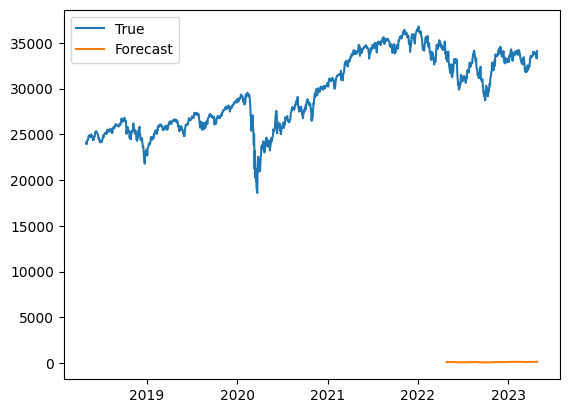

In [ ]:
!pip install pytorch-lightning
!pip install neuralforecast

# Define the TimesNet model
# Define the TimesNet model
class TimesNet(pl.LightningModule):
    def __init__(self, input_size, hidden_size, conv_hidden_size, output_size):
        super(TimesNet, self).__init__()
        self.conv1 = nn.Conv1d(input_size, conv_hidden_size, kernel_size=3, padding=1)
        self.conv2 = nn.Conv1d(conv_hidden_size, conv_hidden_size, kernel_size=3, padding=1)
        self.fc1 = nn.Linear(conv_hidden_size, hidden_size)
        self.fc2 = nn.Linear(hidden_size, output_size)

    def forward(self, x):
        # Add channel dimension and transpose
        x = x.unsqueeze(1).transpose(1, 2)  # Shape (batch_size, input_size, sequence_length)
        x = F.relu(self.conv1(x))
        x = F.relu(self.conv2(x))
        x = F.max_pool1d(x, kernel_size=x.size(2))
        x = x.squeeze(-1)  # Squeeze the last dimension
        x = F.relu(self.fc1(x))
        x = self.fc2(x)
        return x

    def training_step(self, batch, batch_idx):
        x, y = batch
        y_hat = self(x)
        loss = F.mse_loss(y_hat, y.unsqueeze(1))
        self.log('train_loss', loss)
        return loss

    def configure_optimizers(self):
        return torch.optim.Adam(self.parameters(), lr=1e-3)

# Load and prepare data
df = pd.read_excel('/content/drive/MyDrive/NewsStocksData/new.xlsx')
df.drop('Unnamed: 0', axis=1, inplace=True)
df.drop('Adj Close Stationary', axis=1, inplace=True)
df['Year'] = df['Date'].apply(lambda time: time.year)
df['Month'] = df['Date'].apply(lambda time: time.month)
df['Day'] = df['Date'].apply(lambda time: time.day)

# Define features and target
X = df.drop('Adj Close**', axis=1)
y = df['Adj Close**']

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

# Extract date columns for plotting
date_all = X['Date']
date_test = X_test['Date']

# Remove date column from features
X_train.drop('Date', axis=1, inplace=True)
X_test.drop('Date', axis=1, inplace=True)

# Normalize the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Convert to PyTorch tensors
X_train_tensor = torch.tensor(X_train_scaled, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train.values, dtype=torch.float32)
X_test_tensor = torch.tensor(X_test_scaled, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test.values, dtype=torch.float32)

# Create DataLoader
train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)

# Initialize the model
timesnet_model = TimesNet(input_size=X_train.shape[1], hidden_size=16, conv_hidden_size=32, output_size=1)

# Train the model
trainer = pl.Trainer(max_epochs=5)
trainer.fit(timesnet_model, train_loader)

# Make predictions
with torch.no_grad():
    y_pred = timesnet_model(X_test_tensor).squeeze().numpy()

# Plot results
plt.plot(date_all, y, label='True')
plt.plot(date_test, y_pred, label='Forecast')
plt.legend()
plt.show()